# Machine Learning Modeling

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import os

## Load Datasets

In [2]:
dir_name = 'data_files/'

X_train = pd.read_csv(dir_name + 'preprocessed_X_train.csv')
y_train = pd.read_csv(dir_name + 'y_train.csv')
X_test = pd.read_csv(dir_name + 'preprocessed_X_test.csv')
y_test = pd.read_csv(dir_name + 'y_test.csv')

In [3]:
X_train.columns

Index(['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng',
       'lat', 'is_weekend', 'room_type_Private room', 'room_type_Shared room',
       'city_Athens', 'city_Barcelona', 'city_Berlin', 'city_Budapest',
       'city_Lisbon', 'city_London', 'city_Paris', 'city_Rome', 'city_Vienna'],
      dtype='object')

## Models Experiment

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Plot y_predict x y_actual

def plot_predict_actual(y_actual, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_pred)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

### Machine Learning Models

In [6]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [26]:
evaluation_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    evaluation_metrics[name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R2': train_r2,
        'Test R2': test_r2
    }

    print(f"📊 {name}")
    print(f"  🟢 Train - MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
    print(f"  🔵 Test  - MAE: {test_mae:.4f}, R2: {test_r2:.4f}\n")

📊 LinearRegression
  🟢 Train - MAE: 82031.1961, R2: 0.2279
  🔵 Test  - MAE: 87075.9607, R2: 0.2278

📊 Ridge
  🟢 Train - MAE: 82178.9100, R2: 0.2265
  🔵 Test  - MAE: 87170.4743, R2: 0.2269

📊 Lasso
  🟢 Train - MAE: 83278.6045, R2: 0.2162
  🔵 Test  - MAE: 88461.9117, R2: 0.2155



c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


📊 RandomForest
  🟢 Train - MAE: 7569.9162, R2: 0.9288
  🔵 Test  - MAE: 37345.4328, R2: 0.6688



c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


📊 GradientBoosting
  🟢 Train - MAE: 61842.4009, R2: 0.4179
  🔵 Test  - MAE: 78051.5244, R2: 0.3078



### Random Forest

In [ ]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Reduce iterations for quicker results
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train.squeeze())

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


Evaluation

In [8]:
y_train_predict = random_search.best_estimator_.predict(X_train)
y_test_predict = random_search.best_estimator_.predict(X_test)

In [9]:
mse_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)

mse_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print("🟢 Train - MSE: ", mse_train)
print("🔵 Test - MSE: ", mse_test)
print("🟢 Train - R2: ", r2_train)
print("🔵 Test - R2: ", r2_test)

🟢 Train - MSE:  6521.625833978992
🔵 Test - MSE:  37566.895153764955
🟢 Train - R2:  0.9386171238582636
🔵 Test - R2:  0.6668369892494332


Feature Importance

In [10]:
importances = random_search.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
14,lat,0.160772
13,lng,0.133061
11,attr_index,0.125806
12,rest_index,0.109944
9,dist,0.102733
10,metro_dist,0.077592
8,bedrooms,0.056114
2,person_capacity,0.052216
7,guest_satisfaction_overall,0.042643
1,room_private,0.020757


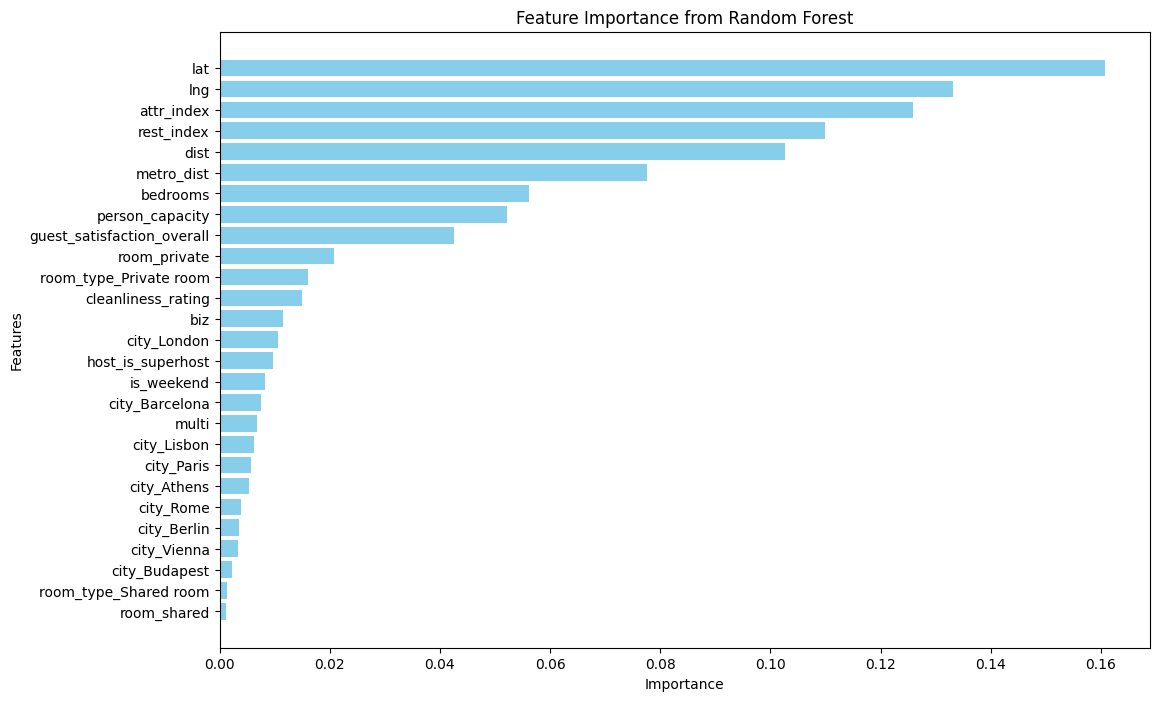

In [11]:
plt.figure(figsize=(12, 8))
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

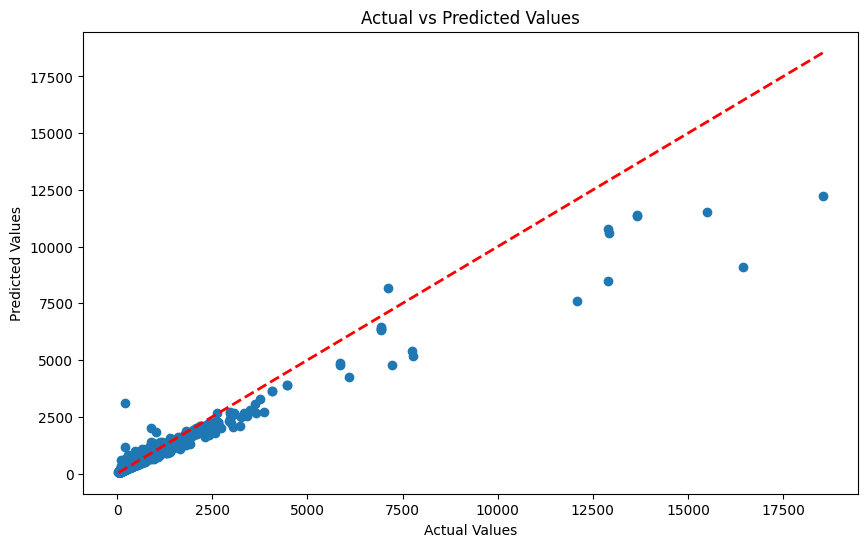

In [17]:
plot_predict_actual(y_actual=y_train, y_pred=y_train_predict)

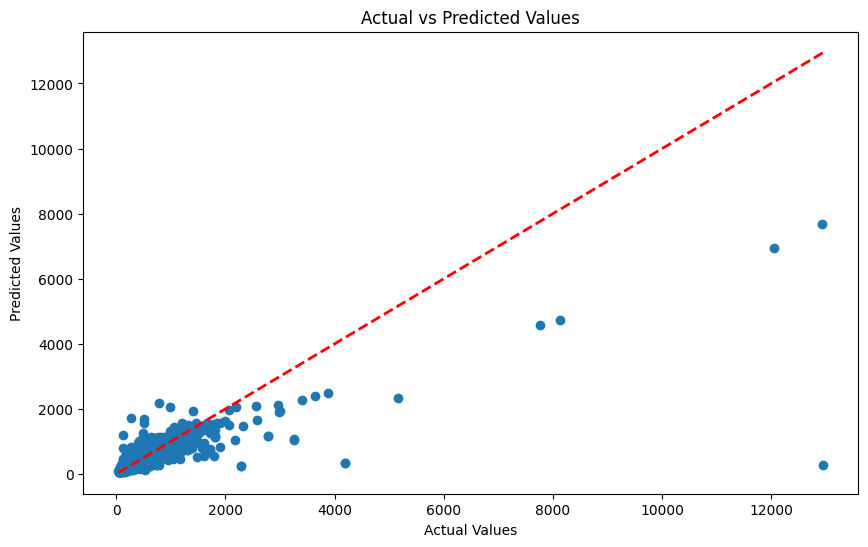

In [16]:
plot_predict_actual(y_actual=y_test, y_pred=y_test_predict)

Save the model

In [15]:
os.makedirs('models', exist_ok=True)

joblib.dump(random_search.best_estimator_, 'models/random_search_best_model_1.pkl')
print("Model saved successfully in 'models/random_search_best_model_1.pkl'")

#joblib.dump(random_search.best_estimator_, 'models/random_search_best_model_1.pkl')
# Load the model later
#best_model = joblib.load('models/random_search_best_model.pkl')

Model saved successfully in 'models/random_search_best_model_1.pkl'


### Stacking

In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=None)),
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1)),
    ('ridge', Ridge(alpha=1.0))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking_model.fit(X_train, y_train)


c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=200)),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=200)),
                              ('ridge', Ridge())],
                  final_estimator=Ridge())

In [28]:
y_train_sm = stacking_model.predict(X_train)
y_test_sm = stacking_model.predict(X_test)

sm_mae = mean_squared_error(y_train, y_train_sm)
sm_r2 = r2_score(y_test, y_test_sm)

print('MAE: ', sm_mae)
print('R2: ', sm_r2)

MAE:  15472.180450746037
R2:  0.5869687458483734
